# In this notebook we will be analyzing the data that consists of House Prices in Boston

# Step 1: Getting and Setting up the Data

In [67]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
%matplotlib inline

In [69]:
from sklearn.datasets import load_boston

In [70]:
boston = load_boston()

In [71]:
print boston.DESCR

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

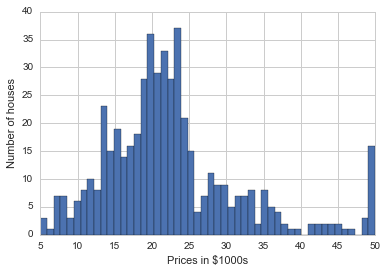

In [72]:
plt.hist(boston.target,bins=50)

plt.xlabel('Prices in $1000s')
plt.ylabel('Number of houses')

# Step 2 - Visualizing the Data

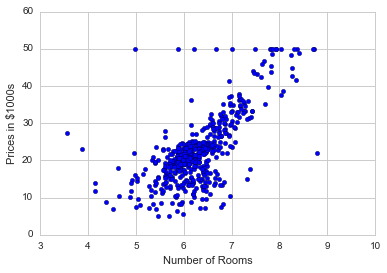

In [73]:
plt.scatter(boston.data[:,5],boston.target)

plt.xlabel('Number of Rooms')
plt.ylabel('Prices in $1000s')

In [74]:
boston_df = DataFrame(boston.data)

boston_df.columns = boston.feature_names

In [75]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [76]:
boston_df['Price'] = boston.target

In [77]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


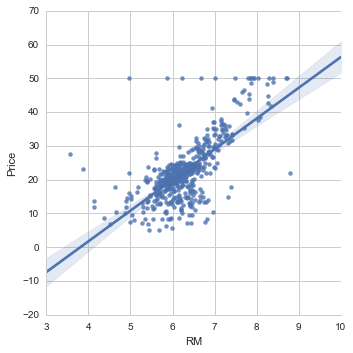

In [78]:
sns.lmplot('RM','Price', data=boston_df)

# Step 3 - Using Numpy for Univariate Linear Regression

In [79]:
X = boston_df.RM

In [80]:
# vstack - Vertically Stack all the values in a single array
X = np.vstack(boston_df.RM)

In [81]:
X.shape

(506L, 1L)

In [82]:
Y = boston_df.Price

In [83]:
# Change X like this array [X 1]
X = np.array([[value,1] for value in X])

In [84]:
X

array([[array([ 6.575]), 1],
       [array([ 6.421]), 1],
       [array([ 7.185]), 1],
       ..., 
       [array([ 6.976]), 1],
       [array([ 6.794]), 1],
       [array([ 6.03]), 1]], dtype=object)

In [85]:
#Get m and b values in y = mx+b for our best fit line
m , b = np.linalg.lstsq(X,Y)[0]

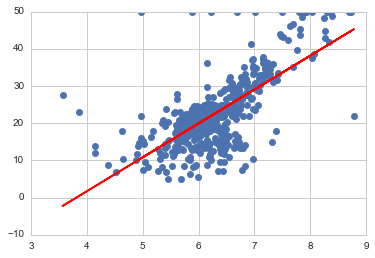

In [86]:
plt.plot(boston_df.RM,boston_df.Price,'o')

x = boston_df.RM

plt.plot(x, m*x+b, 'r' ,label = 'Best Fit Line')

# Step 4 - Getting the error

In [87]:
# Get the resulting array
result = np.linalg.lstsq(X,Y)

# Get the total error
error_total = result[1]

# Get the root mean square error
rmse = np.sqrt(error_total/len(X))

print 'The root mean square error was %.2f' %rmse

The root mean square error was 6.60


# Step 5 - Using Scikit learn to implement Mutivariate Regression

In [88]:
# Import from Linear Regression
import sklearn 
from sklearn.linear_model import LinearRegression

In [89]:
lreg = LinearRegression()

In [90]:
X_multi = boston_df.drop('Price',1)

Y_target = boston_df.Price

In [91]:
lreg.fit(X_multi,Y_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [92]:
print ' The estimated intercept coefficient is %.2f' % lreg.intercept_
print ' The no. of coefficients used were %d' % len(lreg.coef_)

 The estimated intercept coefficient is 36.49
 The no. of coefficients used were 13


In [93]:
coeff_df = DataFrame(boston_df.columns)
coeff_df.columns = ['Features']

coeff_df['Coefficient Estimate'] = Series(lreg.coef_)
coeff_df

,Features,Coefficient Estimate
0,CRIM,-0.107171
1,ZN,0.046395
2,INDUS,0.020860
3,CHAS,2.688561
4,NOX,-17.795759
5,RM,3.804752
6,AGE,0.000751
7,DIS,-1.475759
8,RAD,0.305655
9,TAX,-0.012329


Lets move on start predicting the house prices

# Step 6 - Training and Validation

In [102]:
from sklearn.model_selection import train_test_split


In [103]:
X_train,X_test,Y_train,Y_test = train_test_split(X,boston_df.Price)

In [105]:
print X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

(379L, 2L) (127L, 2L) (379L,) (127L,)


In [106]:
lreg = LinearRegression()

lreg.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [107]:
predict_train = lreg.predict(X_train)
predict_test = lreg.predict(X_test)

In [108]:
print "Fit a model X_train and calculate the MSE with Y_train: %.2f" % np.mean((Y_train-predict_train)**2)

print "Fit a model X_train and calculate the MSE with X_test and Y_test: %.2f" % np.mean((Y_test-predict_test)**2)

Fit a model X_train and calculate the MSE with Y_train: 38.67
Fit a model X_train and calculate the MSE with X_test and Y_test: 58.79


Lets do a residual plot to visualize our analysis

# Step 7 - Residual Plots

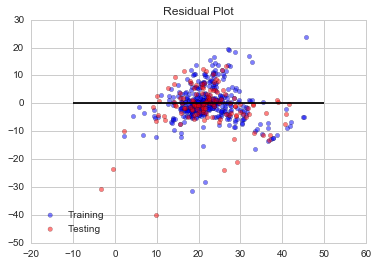

In [115]:
train = plt.scatter(predict_train,(predict_train - Y_train), c = 'b', alpha = 0.5)
test = plt.scatter(predict_test,(predict_test - Y_test), c = 'r', alpha = 0.5)

plt.hlines(y=0,xmin=-10,xmax=50)

plt.legend((train,test),('Training','Testing'),loc='lower left')
plt.title('Residual Plot')

Awesome !!! From above plot its clear that there are no major patterns to be concerned about, majority of the residuals are randomly allocated above and below the horizontal line